Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [3]:
import warnings

warnings.filterwarnings('ignore')

In [1]:
#Импортируйте библиотеки pandas, numpy и matplotlib.
import numpy as np
import pandas as pd

In [2]:
#Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
from sklearn.datasets import load_boston

In [4]:
#Создайте датафреймы X и y из этих данных.
boston = load_boston()

In [5]:
data = boston["data"]

In [6]:
feature_names = boston["feature_names"]

In [7]:
target = boston["target"]

In [8]:
X = pd.DataFrame(data, columns=feature_names)

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
y = pd.DataFrame(target, columns=["price"])

In [10]:
#Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
#с помощью функции train_test_split так, чтобы размер тестовой выборки
#составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42

from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
#Масштабируйте данные с помощью StandardScaler.
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler(with_mean=False)

In [16]:
from sklearn.decomposition import PCA

In [14]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [17]:
pca = PCA(random_state=100)

pca.fit(X_train_scaled)

print(pca.explained_variance_ratio_)

[0.46365886 0.11401877 0.09775484 0.06702416 0.06538962 0.05115833
 0.04108269 0.03042998 0.02084603 0.01702393 0.01379156 0.01293276
 0.00488848]


In [20]:
pca.explained_variance_ratio_[:9].sum()

0.9513632741043487

In [22]:
pca = PCA(n_components=9, random_state=100)

X_train_mc = pca.fit_transform(X_train_scaled)
X_test_mc = pca.transform(X_test_scaled)

In [23]:
#Постройте модель TSNE на тренировочный данных с параметрами:
#n_components=2, learning_rate=250, random_state=42.

from sklearn.manifold import TSNE

In [25]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

In [26]:
print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


In [28]:
import matplotlib.pyplot as plt

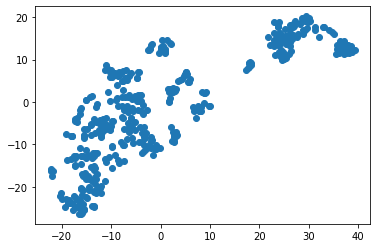

In [29]:
#Постройте диаграмму рассеяния на этих данных.
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [30]:
#С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
#Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42, max_iter=100)

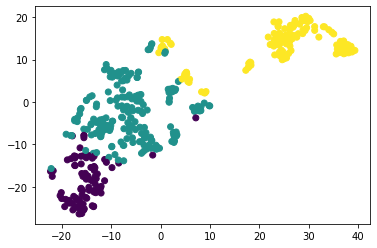

In [33]:
#Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,и раскрасьте точки из разных кластеров разными цветами.
kmeans = KMeans(n_clusters=3)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [34]:
#Вычислите средние значения price и CRIM в разных кластерах.

labels_test = kmeans.predict(X_test_scaled)

In [35]:
y_train.mean()

price    22.796535
dtype: float64

In [36]:
y_train[labels_train == 0].mean()

price    27.788372
dtype: float64

In [37]:
y_train[labels_train == 1].mean()

price    24.958115
dtype: float64

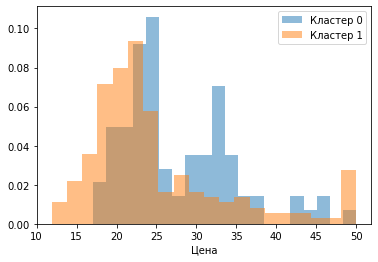

In [38]:
plt.hist(y_train[labels_train == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 1], bins=20, density=True, alpha=0.5)

plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('Цена')

plt.show()

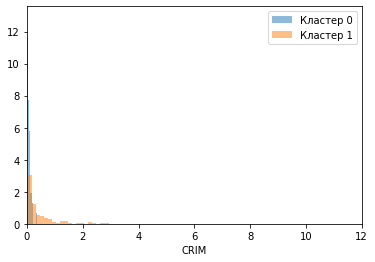

In [40]:
plt.hist(X_train.loc[labels_train == 0, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train == 1, 'CRIM'], bins=20, density=True, alpha=0.5)

plt.xlim(0, 12)
plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('CRIM')

plt.show()